## Step 1: Importing and Merging Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [2]:
# Importing all datasets
leads_data = pd.read_csv("Leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Step 2: Inspecting the Dataframe

In [3]:
# Let's check the dimensions of the dataframe
leads_data.shape

(9240, 37)

In [4]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Check the numeric attributes
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step 3: Data Preparation

#### Convert Yes/ No to 1/0

In [6]:
# List of variables to map to 0/1 from no/yes

varlist =  ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_data[varlist] = leads_data[varlist].apply(binary_map)

In [7]:
# Check the spread of 'Yes' / ' No' (1/0) variables
leads_data[varlist].sum()

Do Not Email                                 734
Do Not Call                                    2
Search                                        14
Magazine                                       0
Newspaper Article                              2
X Education Forums                             1
Newspaper                                      1
Digital Advertisement                          4
Through Recommendations                        7
Receive More Updates About Our Courses         0
Update me on Supply Chain Content              0
Get updates on DM Content                      0
I agree to pay the amount through cheque       0
A free copy of Mastering The Interview      2888
dtype: int64

In [8]:
## Drop the irrelevant columns as the count of value = 1 is very low.
leads_data = leads_data.drop(['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], 1)

In [9]:
# Check the info of the dataframe again for null / not null values
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [10]:
# Drop Prospect ID as Lead Number is unique 
leads_data = leads_data.drop(['Prospect ID'], 1)

In [11]:
leads_data.shape

(9240, 24)

In [12]:
# Some columns have "Select" values which can be replaced with Nulls. 

leads_data['Specialization'] = leads_data['Specialization'].replace('Select', np.nan)
leads_data['How did you hear about X Education'] = leads_data['How did you hear about X Education'].replace('Select', np.nan)
leads_data['Lead Profile'] = leads_data['Lead Profile'].replace('Select', np.nan)
leads_data['City'] = leads_data['City'].replace('Select', np.nan)

In [13]:
# Checking the percentage of missing values / null values
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     74.19
City                                             39.71
Asymmetriq

In [14]:
# Lets drop columns with greater than 30% nulls
leads_data = leads_data.drop(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality',
                          'Lead Profile','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                          'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [15]:
# Checking the percentage of missing values
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
dtype: float64

#### Check for the columns where null values are high and assess if we should remove them

In [16]:
# Check values for Country.
leads_data['Country'].value_counts() / leads_data['Country'].count() * 100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

In [17]:
leads_data['What matters most to you in choosing a course'].value_counts() / leads_data['What matters most to you in choosing a course'].count() * 100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

In [18]:
leads_data['What is your current occupation'].value_counts() / leads_data['What is your current occupation'].count() * 100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [19]:
# based on the above information, Country and 'What matters most to you in choosing a course' can be dropped as apart from 
# nulls, almost all values are single eg India and Better Career Prospects respectively
leads_data = leads_data.drop(['What matters most to you in choosing a course', 'Country'], axis=1)

#### Check for the columns where null values are low, but need to be replaced with an alternate value to remove nulls

In [20]:
leads_data['Lead Source'].value_counts() / leads_data['Lead Source'].count() * 100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

In [21]:
leads_data['Last Activity'].value_counts() / leads_data['Last Activity'].count() * 100

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

In [22]:
# Since The values are not skewed or not specific, we replace the nulls with "No Information"

leads_data['What is your current occupation'] = leads_data['What is your current occupation'].replace(np.nan, 'No Information')
leads_data['Lead Source'] = leads_data['Lead Source'].replace(np.nan, 'No Information')
leads_data['Last Activity'] = leads_data['Last Activity'].replace(np.nan, 'No Information')

In [23]:
# google is twice in the data and so replace with Google.
leads_data['Lead Source'] = leads_data['Lead Source'].replace('google', 'Google')

In [24]:
# Checking the percentage of missing values
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.00
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             0.00
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [25]:
leads_data.describe()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,9240.000000
mean,617188.435606,0.079437,0.385390,3.445238,487.698268,2.362820,0.312554
std,23405.995698,0.270435,0.486714,4.854853,548.021466,2.161418,0.463559
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,0.000000,1.000000,12.000000,1.000000,0.000000
50%,615479.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000
75%,637387.250000,0.000000,1.000000,5.000000,936.000000,3.000000,1.000000
max,660737.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000


In [26]:
# For numeric columns, we replace the null with the median.
leads_data['TotalVisits'] = leads_data['TotalVisits'].replace(np.nan, leads_data['TotalVisits'].median())
leads_data['Page Views Per Visit'] = leads_data['Page Views Per Visit'].replace(np.nan, leads_data['Page Views Per Visit'].median())

In [27]:
# Checking the percentage of missing values
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

## Step 4 - Perform Visual analysis

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

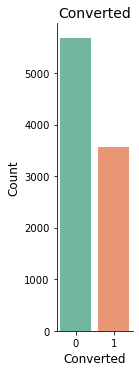

In [29]:
# Conversion Rate 

plot = sns.catplot(x="Converted", kind="count", data=leads_data, palette="Set2", aspect= 0.4);

plt.title('Converted', fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

plt.show()

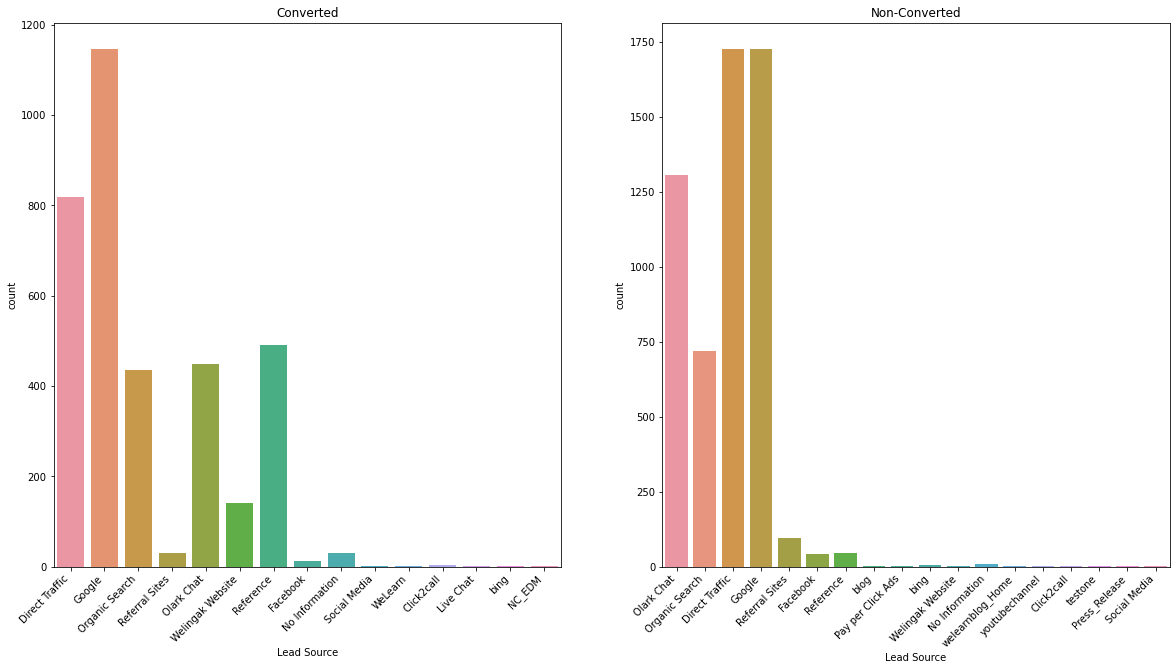

In [30]:
# Lead Source based analysis of data
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'Lead Source',data=leads_data[leads_data["Converted"]==1])
plt.title('Converted')
ax.set(xlabel='Lead Source')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'Lead Source',data=leads_data[leads_data["Converted"]==0])
plt.title('Non-Converted')
ax.set(xlabel='Lead Source')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

Text(0, 0.5, 'Count')

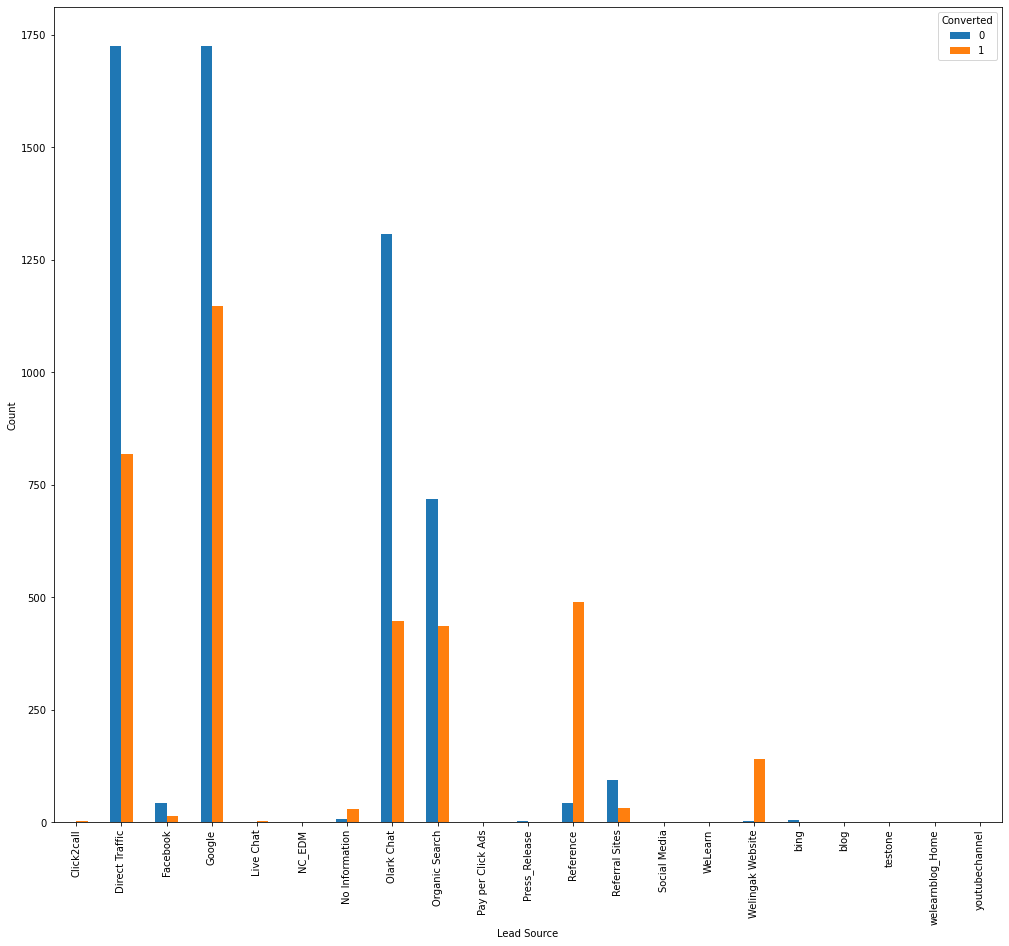

In [31]:
# Lead Source based analysis of data
leads_data.pivot_table(values='Lead Number',index='Lead Source',columns='Converted',aggfunc='count').plot.bar(figsize=(17,15))
plt.xlabel('Lead Source')
plt.ylabel('Count')

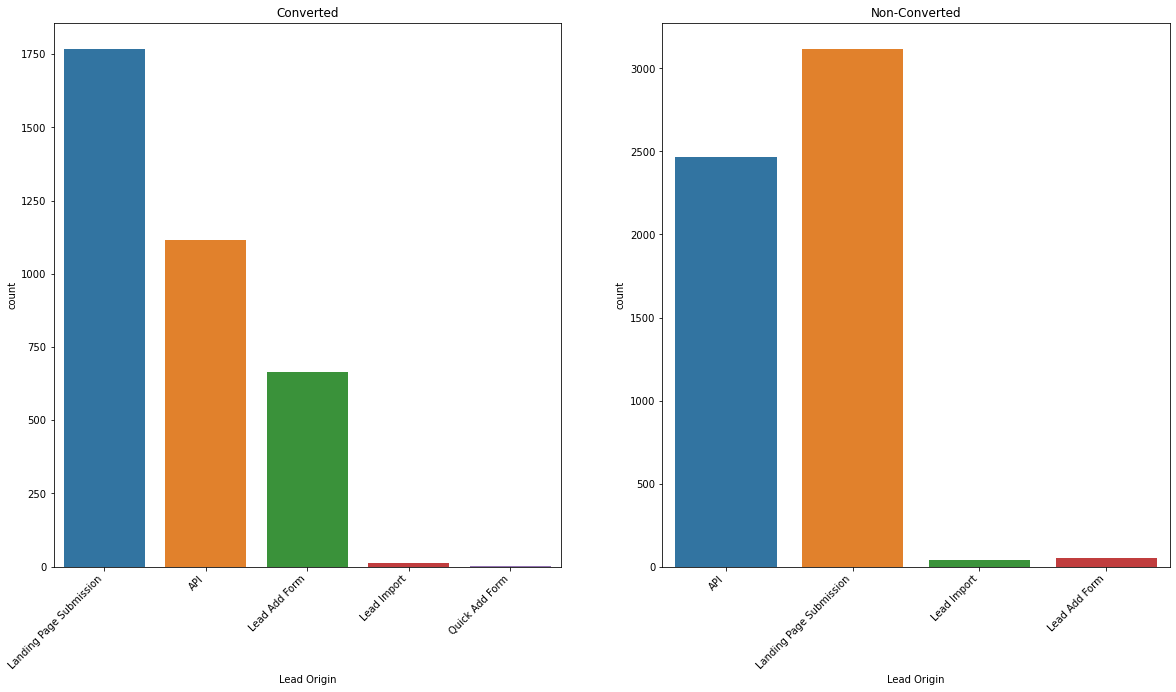

In [32]:
# Lead Origin based analysis of data
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'Lead Origin',data=leads_data[leads_data["Converted"]==1])
plt.title('Converted')
ax.set(xlabel='Lead Origin')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'Lead Origin',data=leads_data[leads_data["Converted"]==0])
plt.title('Non-Converted')
ax.set(xlabel='Lead Origin')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

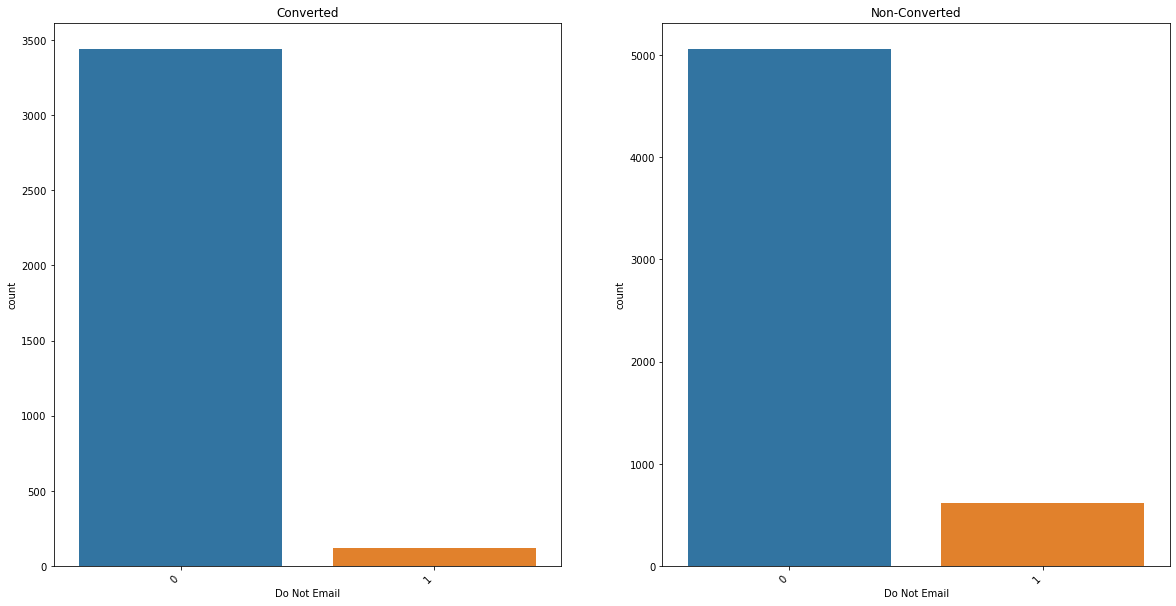

In [33]:
# Do not email based analysis of data
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'Do Not Email',data=leads_data[leads_data["Converted"]==1])
plt.title('Converted')
ax.set(xlabel='Do Not Email')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'Do Not Email',data=leads_data[leads_data["Converted"]==0])
plt.title('Non-Converted')
ax.set(xlabel='Do Not Email')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

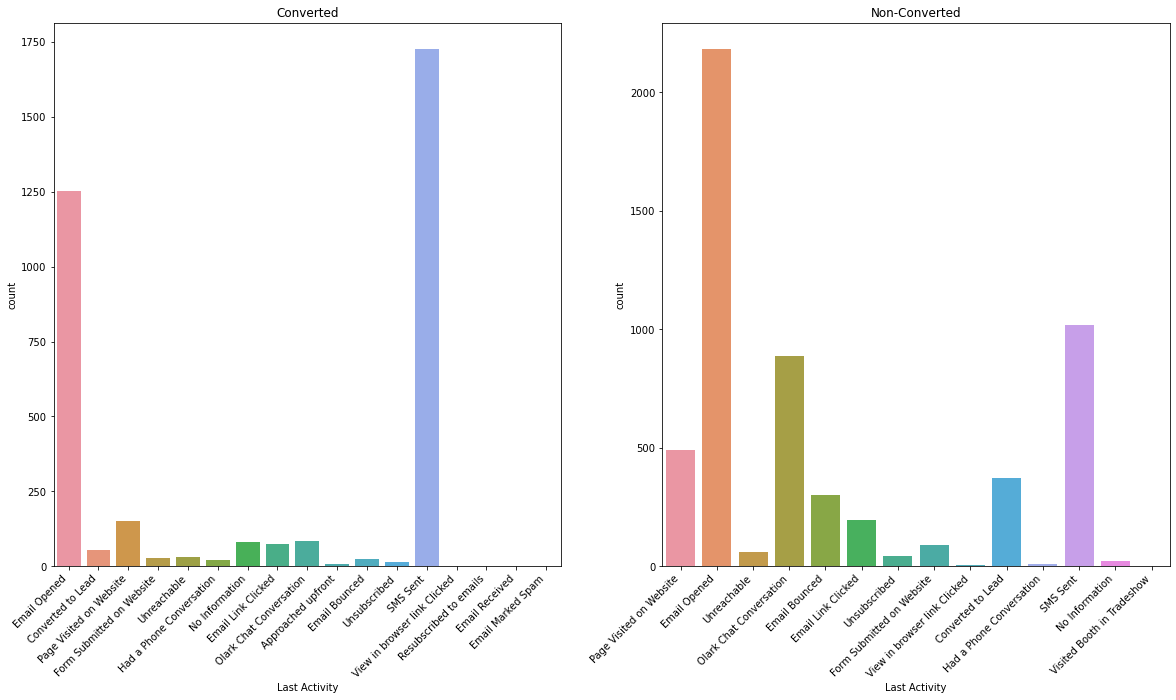

In [34]:
# Last Activity based analysis of data
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'Last Activity',data=leads_data[leads_data["Converted"]==1])
plt.title('Converted')
ax.set(xlabel='Last Activity')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'Last Activity',data=leads_data[leads_data["Converted"]==0])
plt.title('Non-Converted')
ax.set(xlabel='Last Activity')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

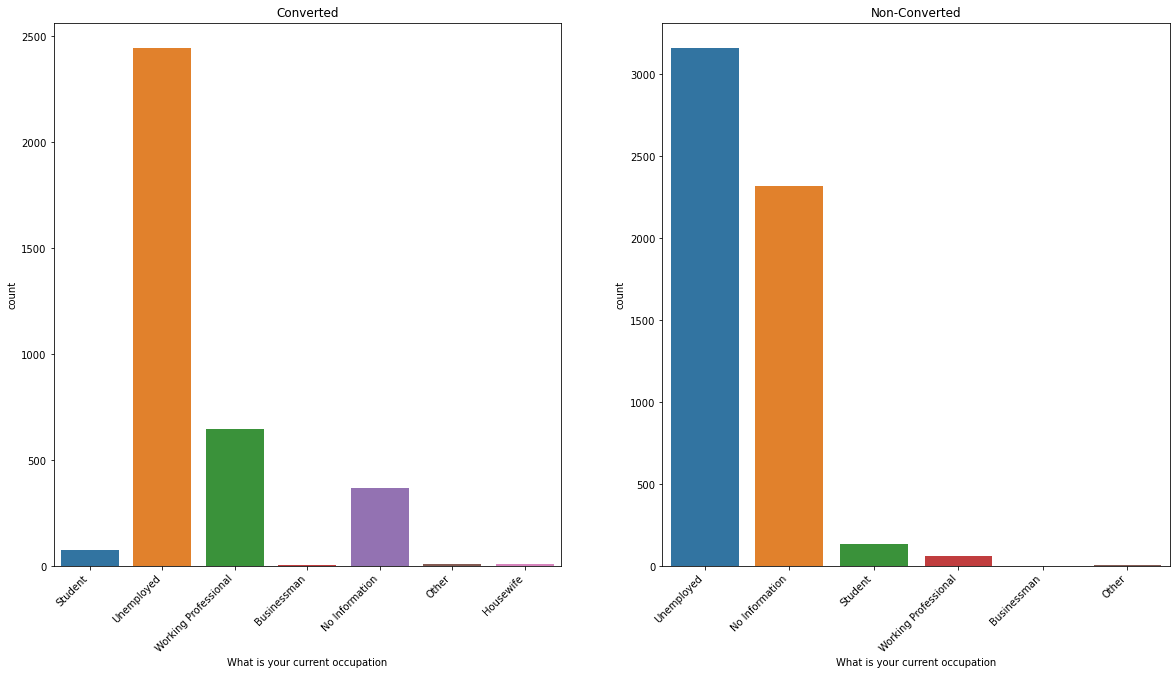

In [35]:
# What is your current occupation based analysis of data
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'What is your current occupation',data=leads_data[leads_data["Converted"]==1])
plt.title('Converted')
ax.set(xlabel='What is your current occupation')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'What is your current occupation',data=leads_data[leads_data["Converted"]==0])
plt.title('Non-Converted')
ax.set(xlabel='What is your current occupation')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

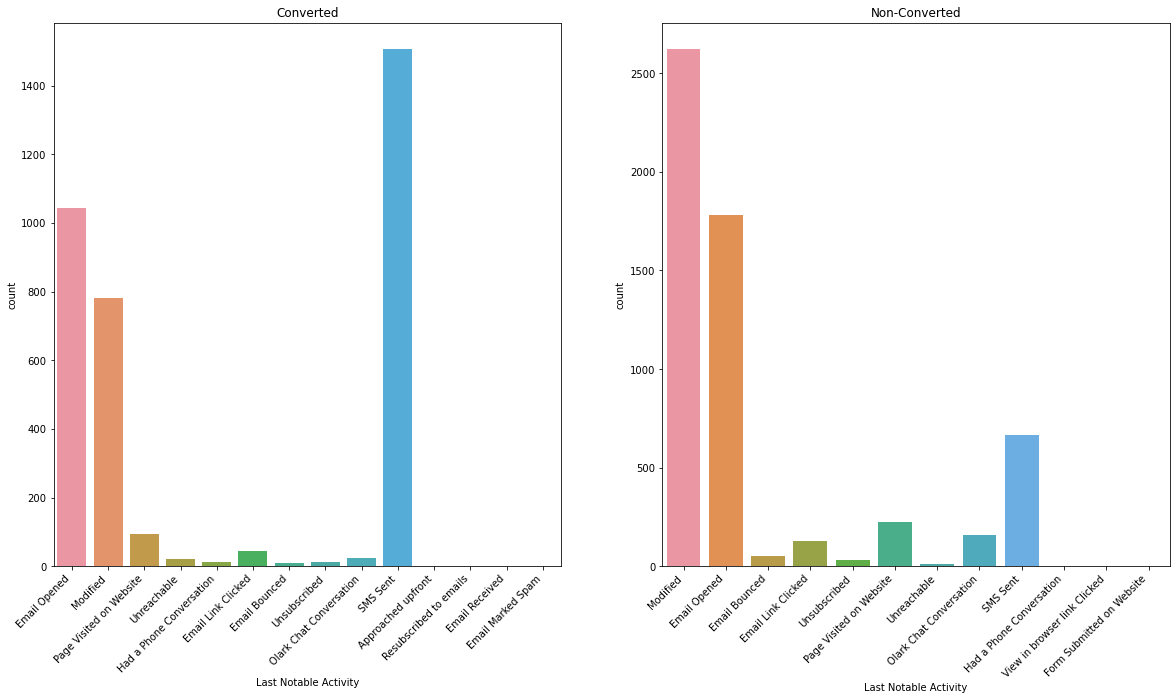

In [36]:
#Last Notable Activity  based analysis of data
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'Last Notable Activity',data=leads_data[leads_data["Converted"]==1])
plt.title('Converted')
ax.set(xlabel='Last Notable Activity')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'Last Notable Activity',data=leads_data[leads_data["Converted"]==0])
plt.title('Non-Converted')
ax.set(xlabel='Last Notable Activity')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

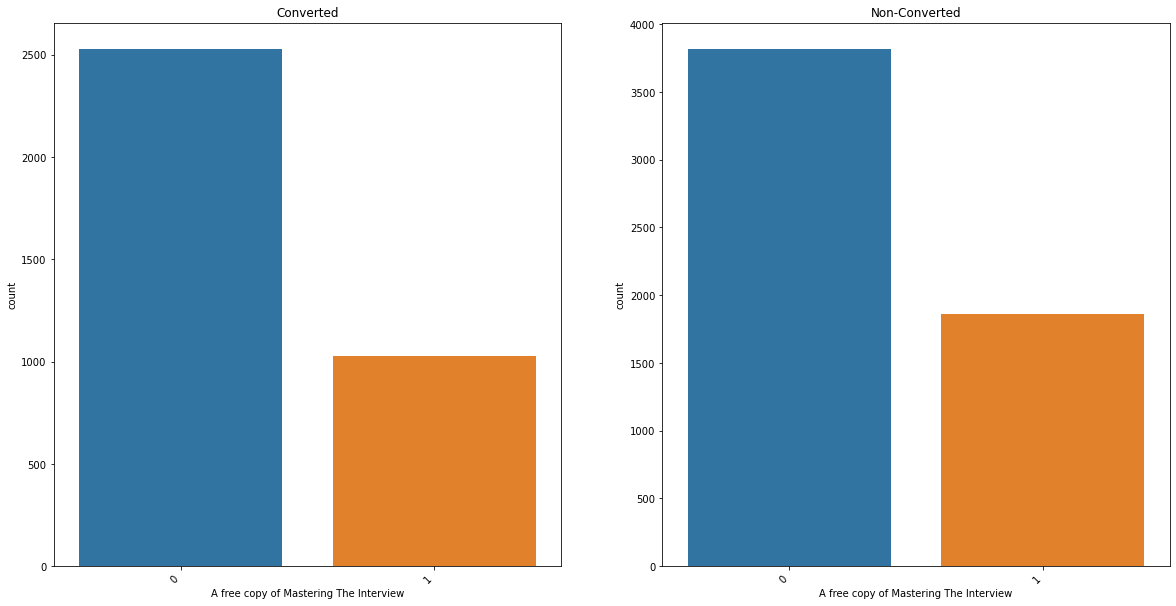

In [37]:
# A free copy of Mastering The Interview based analysis of data
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'A free copy of Mastering The Interview',data=leads_data[leads_data["Converted"]==1])
plt.title('Converted')
ax.set(xlabel='A free copy of Mastering The Interview')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'A free copy of Mastering The Interview',data=leads_data[leads_data["Converted"]==0])
plt.title('Non-Converted')
ax.set(xlabel='A free copy of Mastering The Interview')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

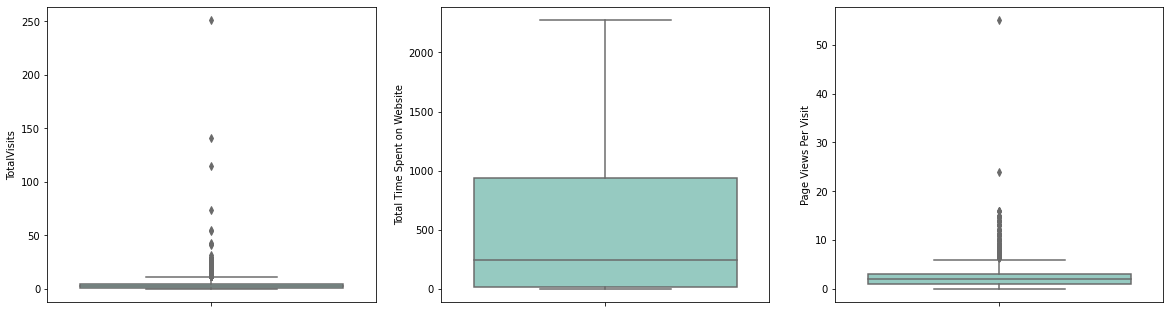

In [38]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set3', data = leads_data)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set3', data = leads_data)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = leads_data)
plt.show()

#### Creating Dummy Variables

In [39]:
ml = pd.get_dummies(leads_data['Lead Source'], prefix='Lead Source')
ml.head()

,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_No Information,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'Lead Origin'
ml = pd.get_dummies(leads_data['Lead Origin'], prefix='Lead Origin')
# Dropping Lead Origin_Quick Add Form column
ml1 = ml.drop(['Lead Origin_Quick Add Form'], 1)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,ml1], axis=1)

# Creating dummy variables for the variable 'Lead Source'.
os = pd.get_dummies(leads_data['Lead Source'], prefix='Lead Source')
os1 = os.drop(['Lead Source_NC_EDM'], 1)
# Adding the results to the master dataframe
leads_data = pd.concat([leads_data,os1], axis=1)

# Creating dummy variables for the variable 'Last Activity'
ml = pd.get_dummies(leads_data['Last Activity'], prefix='Last Activity')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['Last Activity_Resubscribed to emails'], 1)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,ml1], axis=1)

# Creating dummy variables for the variable 'What is your current occupation'.
os = pd.get_dummies(leads_data['What is your current occupation'], prefix='Current Occupation')
os1 = os.drop(['Current Occupation_Businessman'], 1)
# Adding the results to the master dataframe
leads_data = pd.concat([leads_data,os1], axis=1)

# Creating dummy variables for the variable 'Last Notable Activity'.
os = pd.get_dummies(leads_data['Last Notable Activity'], prefix='Last Notable Activity')
os1 = os.drop(['Last Notable Activity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
leads_data = pd.concat([leads_data,os1], axis=1)

In [41]:
# Remove following columns from the leadInfo

# a) Lead Numbers
# b) Lead Origin
# c) Lead Source
# d) Last Activity
# e) What is your current occupation
# f) Last Notable Activity

leads_data = leads_data.drop(['Lead Number', 'Lead Origin', 'Lead Source', 'Last Activity',
                          'What is your current occupation', 'Last Notable Activity'], axis=1)

In [42]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 68 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Do Not Email                                        9240 non-null   int64  
 1   Converted                                           9240 non-null   int64  
 2   TotalVisits                                         9240 non-null   float64
 3   Total Time Spent on Website                         9240 non-null   int64  
 4   Page Views Per Visit                                9240 non-null   float64
 5   A free copy of Mastering The Interview              9240 non-null   int64  
 6   Lead Origin_API                                     9240 non-null   uint8  
 7   Lead Origin_Landing Page Submission                 9240 non-null   uint8  
 8   Lead Origin_Lead Add Form                           9240 non-null   uint8  
 9

## Step 5 - Test Train Split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# Putting feature variable to X
X = leads_data.drop(['Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [45]:
# Putting response variable to y
y = leads_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [46]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 6: Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(
                                                                                X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,-0.656434,-0.885371,-1.085519,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0,0.100767,0.005716,-0.470569,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0,0.290067,-0.691418,0.070401,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0,0.290067,1.365219,1.226321,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,0,-0.656434,-0.885371,-1.085519,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [49]:
### Checking the Converted Rate
converted = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
converted

38.53896103896104

## Step 7: Model Building

In [50]:
import statsmodels.api as sm

In [51]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6405
Model Family:                Binomial   Df Model:                           62
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2554.7
Date:                Sun, 16 Jun 2024   Deviance:                       5109.4
Time:                        15:57:22   Pearson chi2:                 6.85e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4169
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                 71.9562   1.38e+05      0.001      1.000    -2.7e+05     2.7e+05
Do Not Email                                          -1.1622      0.221     -5.257      0.000      -1.595      -0.729
TotalVisits                                            0.1855      0.049      3.772      0.000       0.089       0.282
Total Time Spent on Website                            1.0925      0.041     26.802      0.000       1.013       1.172
Page Views Per Visit                                  -0.1159      0.054     -2.148      0.032      -0.222      -0.010
A free copy of Mastering The Interview                -0.0172      0.107     -0.160      0.873      -0.227       0.193
Lead Origin_API                                      -22.8279   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Origin_Landing Page Submission                  -23.0411   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Origin_Lead Add Form                            -20.6631   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Origin_Lead Import                              -22.2766   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Click2call                               -24.5952   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Direct Traffic                           -24.8187   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Facebook                                 -25.0457   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                                   -24.4666   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Live Chat                                 -2.7080   9.73e+04  -2.78e-05      1.000   -1.91e+05    1.91e+05
Lead Source_No Information                           -23.7128   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                               -23.5352   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Organic Search                           -24.6637   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Pay per Click Ads                        -46.3896   1.12e+05     -0.000      1.000    -2.2e+05     2.2e+05
Lead Source_Press_Release                            -45.0236   9.68e+04     -0.000      1.000    -1.9e+05     1.9e+05
Lead Source_Reference                                -23.3371   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Referral Sites                           -24.7235   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Social Media                             -22.5706   7.95e+04     -0.000      1.000   -1.56e+05  

## Step 8: Feature Selection Using RFE

In [52]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [53]:
from sklearn.feature_selection import RFE


In [54]:
rfe = RFE(logreg,n_features_to_select=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [55]:
rfe.support_

array([ True, False,  True, False, False, False, False,  True, False,
       False,  True,  True,  True, False, False, False,  True, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False, False,  True, False, False, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False,  True, False, False])

In [56]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 32),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 35),
 ('A free copy of Mastering The Interview', False, 44),
 ('Lead Origin_API', False, 10),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 14),
 ('Lead Source_Click2call', False, 19),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 31),
 ('Lead Source_No Information', False, 38),
 ('Lead Source_Olark Chat', False, 11),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 25),
 ('Lead Source_Press_Release', False, 29),
 ('Lead Source_Reference', False, 12),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 13),
 ('Lead Source_WeLearn', False, 23),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False,

In [57]:
# variables shortlisted by RFE

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Approached upfront',
       'Last Activity_Email Opened', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'Current Occupation_Housewife',
       'Current Occupation_No Information',
       'Current Occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

#### Assessing the stats model

In [58]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2591.3
Date:                Sun, 16 Jun 2024   Deviance:                       5182.6
Time:                        15:57:25   Pearson chi2:                 6.80e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4103
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.1712      0.128     -1.336      0.182      -0.422       0.080
Do Not Email                                      -1.0121      0.174     -5.825      0.000      -1.353      -0.672
Total Time Spent on Website                        1.0954      0.040     27.243      0.000       1.017       1.174
Lead Origin_Lead Add Form                          2.2450      0.198     11.364      0.000       1.858       2.632
Lead Source_Direct Traffic                        -1.4820      0.116    -12.737      0.000      -1.710      -1.254
Lead Source_Facebook                              -1.2078      0.512     -2.359      0.018      -2.211      -0.204
Lead Source_Google                                -1.0493      0.111     -9.462      0.000      -1.267      -0.832
Lead Source_Organic Search                        -1.2610      0.135     -9.328      0.000      -1.526      -0.996
Lead Source_Referral Sites                        -1.1547      0.327     -3.527      0.000      -1.796      -0.513
Lead Source_Welingak Website                       1.9011      0.742      2.561      0.010       0.446       3.356
Last Activity_Approached upfront                  23.7684   2.71e+04      0.001      0.999   -5.31e+04    5.31e+04
Last Activity_Email Opened                         0.5173      0.109      4.733      0.000       0.303       0.732
Last Activity_Had a Phone Conversation             1.4839      0.967      1.535      0.125      -0.411       3.379
Last Activity_SMS Sent                             1.6187      0.109     14.786      0.000       1.404       1.833
Current Occupation_Housewife                      23.8415    2.3e+04      0.001      0.999    -4.5e+04     4.5e+04
Current Occupation_No Information                 -1.0999      0.087    -12.578      0.000      -1.271      -0.928
Current Occupation_Working Professional            2.5705      0.189     13.575      0.000       2.199       2.942
Last Notable Activity_Had a Phone Conversation     2.2946      1.474      1.557      0.120      -0.595       5.184
Last Notable Activity_Modified                    -0.7414      0.090     -8.216      0.000      -0.918      -0.565
Last Notable Activity_Olark Chat Conversation     -0.6943      0.343     -2.027      0.043      -1.366      -0.023
Last Notable Activity_Unreachable                  2.2199      0.549      4.045      0.000       1.144       3.295
==================================================================================================================
"""

#### Dropping CurrentOccupation_Housewife &  Last Activity_Approached upfront due to high p value

In [59]:
col = col.drop(['Last Activity_Approached upfront','Current Occupation_Housewife'],1)

#### reassess Model - Model 3

In [60]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2602.7
Date:                Sun, 16 Jun 2024   Deviance:                       5205.3
Time:                        15:57:25   Pearson chi2:                 6.82e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4082
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.1545      0.128     -1.210      0.226      -0.405       0.096
Do Not Email                                      -1.0264      0.174     -5.909      0.000      -1.367      -0.686
Total Time Spent on Website                        1.0963      0.040     27.305      0.000       1.018       1.175
Lead Origin_Lead Add Form                          2.2754      0.197     11.560      0.000       1.890       2.661
Lead Source_Direct Traffic                        -1.4812      0.116    -12.755      0.000      -1.709      -1.254
Lead Source_Facebook                              -1.2176      0.512     -2.379      0.017      -2.221      -0.214
Lead Source_Google                                -1.0491      0.111     -9.479      0.000      -1.266      -0.832
Lead Source_Organic Search                        -1.2512      0.135     -9.286      0.000      -1.515      -0.987
Lead Source_Referral Sites                        -1.1649      0.327     -3.560      0.000      -1.806      -0.524
Lead Source_Welingak Website                       1.8630      0.742      2.510      0.012       0.408       3.318
Last Activity_Email Opened                         0.5067      0.109      4.661      0.000       0.294       0.720
Last Activity_Had a Phone Conversation             1.4538      0.968      1.502      0.133      -0.444       3.351
Last Activity_SMS Sent                             1.6003      0.109     14.681      0.000       1.387       1.814
Current Occupation_No Information                 -1.1100      0.087    -12.709      0.000      -1.281      -0.939
Current Occupation_Working Professional            2.5569      0.189     13.515      0.000       2.186       2.928
Last Notable Activity_Had a Phone Conversation     2.3093      1.475      1.566      0.117      -0.582       5.200
Last Notable Activity_Modified                    -0.7301      0.090     -8.117      0.000      -0.906      -0.554
Last Notable Activity_Olark Chat Conversation     -0.7073      0.343     -2.065      0.039      -1.379      -0.036
Last Notable Activity_Unreachable                  2.2063      0.549      4.018      0.000       1.130       3.282
==================================================================================================================
"""

#### Drop Column Last Activity_Had a Phone Conversation due to high p value

In [61]:
col = col.drop('Last Activity_Had a Phone Conversation',1)

#### reassess - model 4

In [62]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2603.9
Date:                Sun, 16 Jun 2024   Deviance:                       5207.7
Time:                        15:57:25   Pearson chi2:                 6.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4080
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.1488      0.128     -1.167      0.243      -0.399       0.101
Do Not Email                                      -1.0307      0.174     -5.931      0.000      -1.371      -0.690
Total Time Spent on Website                        1.0973      0.040     27.334      0.000       1.019       1.176
Lead Origin_Lead Add Form                          2.2847      0.197     11.608      0.000       1.899       2.670
Lead Source_Direct Traffic                        -1.4797      0.116    -12.746      0.000      -1.707      -1.252
Lead Source_Facebook                              -1.2197      0.512     -2.382      0.017      -2.223      -0.216
Lead Source_Google                                -1.0493      0.111     -9.482      0.000      -1.266      -0.832
Lead Source_Organic Search                        -1.2460      0.135     -9.255      0.000      -1.510      -0.982
Lead Source_Referral Sites                        -1.1389      0.324     -3.515      0.000      -1.774      -0.504
Lead Source_Welingak Website                       1.8537      0.742      2.498      0.013       0.399       3.308
Last Activity_Email Opened                         0.4986      0.109      4.595      0.000       0.286       0.711
Last Activity_SMS Sent                             1.5925      0.109     14.636      0.000       1.379       1.806
Current Occupation_No Information                 -1.1105      0.087    -12.717      0.000      -1.282      -0.939
Current Occupation_Working Professional            2.5656      0.189     13.571      0.000       2.195       2.936
Last Notable Activity_Had a Phone Conversation     3.7571      1.117      3.365      0.001       1.569       5.945
Last Notable Activity_Modified                    -0.7264      0.090     -8.081      0.000      -0.903      -0.550
Last Notable Activity_Olark Chat Conversation     -0.7133      0.343     -2.082      0.037      -1.385      -0.042
Last Notable Activity_Unreachable                  2.1982      0.549      4.003      0.000       1.122       3.274
==================================================================================================================
"""

#### The p values look ok now so proceeding to prediction

In [63]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.349370
6795    0.245321
3516    0.399158
8105    0.869036
3934    0.206163
4844    0.989787
3297    0.154834
8071    0.975594
987     0.078728
7423    0.928314
dtype: float64

In [64]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.34937014, 0.24532112, 0.39915785, 0.86903607, 0.2061632 ,
       0.98978655, 0.15483385, 0.97559358, 0.07872777, 0.92831447])

#### Creating a dataframe with the actual coverted flag and the predicted probabilities

In [65]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Index'] = y_train.index
y_train_pred_final['Pred_Score'] = y_train_pred_final['Converted_Prob']* 100
y_train_pred_final.head()

,Converted,Converted_Prob,Index,Pred_Score
0,0,0.349370,1871,34.937014
1,0,0.245321,6795,24.532112
2,0,0.399158,3516,39.915785
3,0,0.869036,8105,86.903607
4,0,0.206163,3934,20.616320


#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [66]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Index,Pred_Score,predicted
0,0,0.349370,1871,34.937014,0
1,0,0.245321,6795,24.532112,0
2,0,0.399158,3516,39.915785,0
3,0,0.869036,8105,86.903607,1
4,0,0.206163,3934,20.616320,0


In [67]:
from sklearn import metrics

In [68]:
# Confusion matrix 
# Predicted /         not_Converted   Converted
# Actual
# not_Converted        
# converted            
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3571  431]
 [ 749 1717]]


In [69]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8175633889919605


#### Overall accuracy is 81 % , so look fine.

### Checking VIFs

In [70]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Source_Google,2.25
9,Last Activity_Email Opened,2.14
3,Lead Source_Direct Traffic,2.03
10,Last Activity_SMS Sent,1.93
14,Last Notable Activity_Modified,1.73
2,Lead Origin_Lead Add Form,1.62
11,Current Occupation_No Information,1.52
6,Lead Source_Organic Search,1.46
8,Lead Source_Welingak Website,1.24
1,Total Time Spent on Website,1.20


#### The VIFs are all within the range and so we can proceed with the next steps.

### Metrics beyond accuracy

In [72]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [73]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.6962692619626926

In [74]:
# Specificity of our logistic regression model
TN / float(TN+FP)

0.892303848075962

In [75]:
# Calculate false postive rate - predicting converted when lead has not
print(FP/ float(TN+FP))

0.10769615192403797


In [76]:
# positive predictive value 
print (TP / float(TP+FP))

0.7993482309124768


In [77]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8266203703703704


## Step 9: Plotting the ROC Curv

1) It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
2) The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
3) The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [78]:
## Define function to draw the ROC curve. 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [79]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

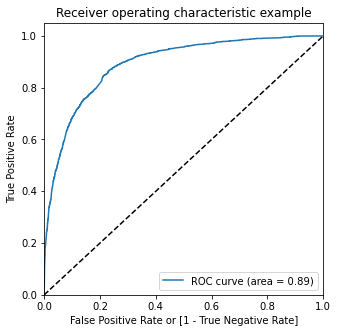

In [80]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## Step 10: Finding Optimal Cutoff Point

In [81]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Index,Pred_Score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.349370,1871,34.937014,0,1,1,1,1,0,0,0,0,0,0
1,0,0.245321,6795,24.532112,0,1,1,1,0,0,0,0,0,0,0
2,0,0.399158,3516,39.915785,0,1,1,1,1,0,0,0,0,0,0
3,0,0.869036,8105,86.903607,1,1,1,1,1,1,1,1,1,1,0
4,0,0.206163,3934,20.616320,0,1,1,1,0,0,0,0,0,0,0


In [82]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.633581  0.968370  0.427286
0.2   0.2  0.764378  0.920925  0.667916
0.3   0.3  0.805040  0.868208  0.766117
0.4   0.4  0.815090  0.768045  0.844078
0.5   0.5  0.817563  0.696269  0.892304
0.6   0.6  0.810761  0.639092  0.916542
0.7   0.7  0.788033  0.533252  0.945027
0.8   0.8  0.765306  0.436740  0.967766
0.9   0.9  0.718924  0.283455  0.987256


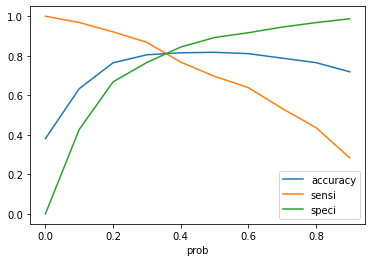

In [83]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve , 0.37 is the optimum point to take it as a cutoff probability

In [84]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Index,Pred_Score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.349370,1871,34.937014,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.245321,6795,24.532112,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.399158,3516,39.915785,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.869036,8105,86.903607,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.206163,3934,20.616320,0,1,1,1,0,0,0,0,0,0,0,0


In [85]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8050401978973407

In [86]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3066,  936],
       [ 325, 2141]], dtype=int64)

In [87]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [88]:
# Let us calculate specificity
TN / float(TN+FP)

0.7661169415292354

In [89]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.23388305847076463


In [90]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6958076048098798


In [91]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9041580654674137


## Precision and Recall

In [92]:
#### Look at the precision and recall for the prediction with threshold .5 (or score 50) and .37 (or score 37)

In [93]:
from sklearn.metrics import precision_score, recall_score

In [94]:
# precision

precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7993482309124768

In [95]:
# recall

recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6962692619626926

In [96]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.6958076048098798

In [97]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8682076236820763

## Precision and recall tradeoff

In [98]:
from sklearn.metrics import precision_recall_curve

In [99]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

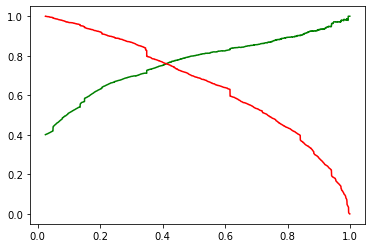

In [100]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 11: Making predictions on the test set

In [101]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(
                                                                                X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_SMS Sent,Current Occupation_No Information,Current Occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
4269,0,0.933036,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
2376,0,-0.900812,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7766,0,-0.793792,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
9199,0,-0.900812,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4359,0,-0.900812,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [102]:
X_test_sm = sm.add_constant(X_test)

#### Making prediction on test data

In [103]:
y_test_pred = res.predict(X_test_sm)

In [104]:
y_test_pred[:10]

4269    0.469343
2376    0.939334
7766    0.936709
9199    0.134271
4359    0.838337
9186    0.651130
1631    0.581345
8963    0.239650
8007    0.034263
5324    0.431513
dtype: float64

In [105]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
4269,0.469343
2376,0.939334
7766,0.936709
9199,0.134271
4359,0.838337


In [106]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [107]:
# Appending y_test_df and y_pred_1

y_test_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [108]:
# Renaming the column 

y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [109]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.37%

y_test_pred_final['final_predicted'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [110]:
y_test_pred_final['Lead_Score'] = round(y_test_pred_final['Converted_Prob']* 100,1)

In [111]:

y_test_pred_final.head()

,Converted,Converted_Prob,final_predicted,Lead_Score
4269,1,0.469343,1,46.9
2376,1,0.939334,1,93.9
7766,1,0.936709,1,93.7
9199,0,0.134271,0,13.4
4359,1,0.838337,1,83.8


In [112]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)

0.8156565656565656

In [113]:
confusion3 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted )
confusion3

array([[1408,  269],
       [ 242,  853]], dtype=int64)

In [114]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [115]:
# test data sensitivity of our logistic regression model
TP / float(TP+FN)

0.7789954337899543

In [116]:
# Let us calculate specificity
TN / float(TN+FP)

0.8395945140131187

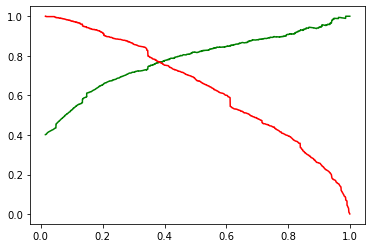

In [117]:
## Precision and Recall metrics for the test set
p, r, thresholds = precision_recall_curve(y_test_pred_final.Converted, y_test_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Summary

In [118]:
# The overall accuracy of the model is 80 % with very similar specificity and sensitivity between Train and Test Dataset
# The lead score calculation is provided in the model with a threshold of 37 for prediction.
# The model provides for a conversion rate on the test dataset at around 80 %
# So the overall model satisfies the user requirements stated in the problem statement.